# _`automaton`_`.push_weights`

Push the weights towards in the initial states.

This algorithm uses a generalized shortest distance defined as:
\begin{align*}
  d[q] = \bigoplus_{\pi \in P(q, F)} E(\pi)
\end{align*}

Where $P(q, F)$ is the set of paths from q to a final state, and $E(\pi)$ is the weight of the path $\pi$, i.e. the product of the weights of its transitions.

`push_weights` is defined for any acyclic automaton, since $P(q, F)$ is finite for any state $q$.

For cyclic automata, $P(q, F)$ might be infinite, in which case `push_weights` is guaranteed to terminate and to be correct only if the sum converges in a finite number of steps. Examples of automata verifying this property include
- automata with weights in $\mathbb{B}$
- automata with positive cycles and weights in $\mathbb{Z}_\text{min}$

Preconditions:
- The weightset is zero-sum-free and weakly divisible
- The shortest distance to the final state is defined for every state of the automaton

Postconditions:
- The Result is equivalent to the input automaton

## Examples

In [1]:
import vcsn

### In a Tropical Semiring

The following example is taken from [mohri.2009.hwa](References.ipynb#mohri.2009.hwa), Figure 12.

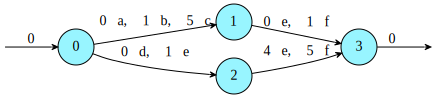

In [2]:
%%automaton --strip a
context = "lal_char, zmin"
$ -> 0
0 -> 1 <0>a, <1>b, <5>c
0 -> 2 <0>d, <1>e
1 -> 3 <0>e, <1>f
2 -> 3 <4>e, <5>f
3 -> $

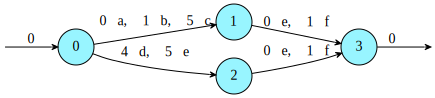

In [3]:
a.push_weights()

Note that weight pushing improves the "minimizability" of weighted automata:

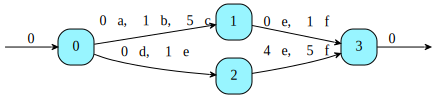

In [4]:
a.minimize()

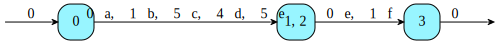

In [5]:
a.push_weights().minimize()

### In $\mathbb{Q}$

Again, the following example is taken from [mohri.2009.hwa](References.ipynb#mohri.2009.hwa), Figure 12 (subfigure 12.d lacks two transitions), but computed in $\mathbb{Q}$ rather than $\mathbb{R}$ to render more readable results.

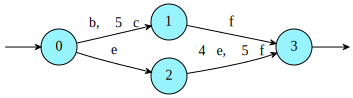

In [6]:
%%automaton --strip a
context = "lal_char, q"
$ -> 0
0 -> 1 <0>a, <1>b, <5>c
0 -> 2 <0>d, <1>e
1 -> 3 <0>e, <1>f
2 -> 3 <4>e, <5>f
3 -> $

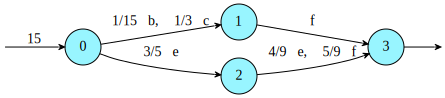

In [7]:
a.push_weights()